In [36]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression

In [37]:
csv = "source/diabetes_2021_health_indicators_BRFSS2021.csv"
diabetes_df = pd.read_csv(csv)
diabetes_df.head(10)

,Diabetes,Pre-Diabetic,Afford Costs,Physical Health,Mental Health,Exercise 30 Days,Heart Attack,Heart Disease,Stroke,Lung Disease,...,Gender,Age,Overweight/Obese,Education,Income,Smoker,Binge Drinker,Heavy Drinker,Fruit>1/Day,Veggies>1/Day
0,0,0,0,0,0,0,0,0,0,1,...,2,6,0,2,3,3,0,0,1,1
1,1,0,0,1,1,0,0,1,0,0,...,2,6,1,2,2,4,0,0,1,2
2,1,0,0,1,0,1,0,0,0,0,...,2,5,1,2,5,4,1,0,1,1
3,0,0,0,1,1,0,0,0,0,1,...,1,6,0,3,4,3,0,0,2,2
4,0,0,0,0,0,1,0,0,0,0,...,2,6,1,2,5,3,0,0,1,1
5,0,0,0,1,0,0,0,0,0,1,...,2,6,1,3,2,2,0,0,2,1
6,1,0,0,1,1,0,0,1,0,0,...,1,6,0,4,5,4,0,0,2,1
7,0,0,0,1,1,0,0,0,0,0,...,2,4,1,2,4,4,0,0,1,1
8,0,0,0,1,1,0,0,0,0,1,...,1,6,1,2,5,1,0,0,2,2
9,0,0,0,0,1,1,0,0,0,0,...,1,6,0,2,1,3,0,0,1,2


In [38]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242888 entries, 0 to 242887
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Diabetes            242888 non-null  int64
 1   Pre-Diabetic        242888 non-null  int64
 2   Afford Costs        242888 non-null  int64
 3   Physical Health     242888 non-null  int64
 4   Mental Health       242888 non-null  int64
 5   Exercise 30 Days    242888 non-null  int64
 6   Heart Attack        242888 non-null  int64
 7   Heart Disease       242888 non-null  int64
 8   Stroke              242888 non-null  int64
 9   Lung Disease        242888 non-null  int64
 10  Kidney Disease      242888 non-null  int64
 11  Difficulty Walking  242888 non-null  int64
 12  Race/Ethnicity      242888 non-null  int64
 13  Overall Health      242888 non-null  int64
 14  Health Plan         242888 non-null  int64
 15  Physical Activity   242888 non-null  int64
 16  High BP             

In [39]:
#checking for missing values (there are no missing values)
diabetes_df.isna().sum() 

Diabetes              0
Pre-Diabetic          0
Afford Costs          0
Physical Health       0
Mental Health         0
Exercise 30 Days      0
Heart Attack          0
Heart Disease         0
Stroke                0
Lung Disease          0
Kidney Disease        0
Difficulty Walking    0
Race/Ethnicity        0
Overall Health        0
Health Plan           0
Physical Activity     0
High BP               0
Gender                0
Age                   0
Overweight/Obese      0
Education             0
Income                0
Smoker                0
Binge Drinker         0
Heavy Drinker         0
Fruit>1/Day           0
Veggies>1/Day         0
dtype: int64

In [40]:
diabetes_df.duplicated().sum()

95667

In [41]:
#drop duplicate rows
diabetes_df_cleaned = diabetes_df.drop_duplicates()
diabetes_df_cleaned.head(10)

,Diabetes,Pre-Diabetic,Afford Costs,Physical Health,Mental Health,Exercise 30 Days,Heart Attack,Heart Disease,Stroke,Lung Disease,...,Gender,Age,Overweight/Obese,Education,Income,Smoker,Binge Drinker,Heavy Drinker,Fruit>1/Day,Veggies>1/Day
0,0,0,0,0,0,0,0,0,0,1,...,2,6,0,2,3,3,0,0,1,1
1,1,0,0,1,1,0,0,1,0,0,...,2,6,1,2,2,4,0,0,1,2
2,1,0,0,1,0,1,0,0,0,0,...,2,5,1,2,5,4,1,0,1,1
3,0,0,0,1,1,0,0,0,0,1,...,1,6,0,3,4,3,0,0,2,2
4,0,0,0,0,0,1,0,0,0,0,...,2,6,1,2,5,3,0,0,1,1
5,0,0,0,1,0,0,0,0,0,1,...,2,6,1,3,2,2,0,0,2,1
6,1,0,0,1,1,0,0,1,0,0,...,1,6,0,4,5,4,0,0,2,1
7,0,0,0,1,1,0,0,0,0,0,...,2,4,1,2,4,4,0,0,1,1
8,0,0,0,1,1,0,0,0,0,1,...,1,6,1,2,5,1,0,0,2,2
9,0,0,0,0,1,1,0,0,0,0,...,1,6,0,2,1,3,0,0,1,2


In [42]:
#checking if duplicated rows are deleted 
diabetes_df_cleaned.duplicated().sum()

0

In [43]:
diabetes_df_cleaned.describe()

,Diabetes,Pre-Diabetic,Afford Costs,Physical Health,Mental Health,Exercise 30 Days,Heart Attack,Heart Disease,Stroke,Lung Disease,...,Gender,Age,Overweight/Obese,Education,Income,Smoker,Binge Drinker,Heavy Drinker,Fruit>1/Day,Veggies>1/Day
count,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,...,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000,147221.000000
mean,0.184600,0.034941,0.109339,0.572806,0.559085,0.689182,0.077441,0.081245,0.057757,0.118882,...,1.513099,4.370171,0.715917,2.910611,4.014088,3.157097,0.176972,0.086571,1.447436,1.240007
std,0.387974,0.183630,0.312065,0.494673,0.496498,0.462830,0.267291,0.273212,0.233284,0.323651,...,0.499830,1.565097,0.450978,0.942238,1.656804,1.041826,0.381646,0.281206,0.497231,0.427089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,2.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,5.000000,1.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,6.000000,1.000000,4.000000,5.000000,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,6.000000,1.000000,4.000000,7.000000,4.000000,1.000000,1.000000,2.000000,2.000000


In [44]:
diabetes_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147221 entries, 0 to 242887
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Diabetes            147221 non-null  int64
 1   Pre-Diabetic        147221 non-null  int64
 2   Afford Costs        147221 non-null  int64
 3   Physical Health     147221 non-null  int64
 4   Mental Health       147221 non-null  int64
 5   Exercise 30 Days    147221 non-null  int64
 6   Heart Attack        147221 non-null  int64
 7   Heart Disease       147221 non-null  int64
 8   Stroke              147221 non-null  int64
 9   Lung Disease        147221 non-null  int64
 10  Kidney Disease      147221 non-null  int64
 11  Difficulty Walking  147221 non-null  int64
 12  Race/Ethnicity      147221 non-null  int64
 13  Overall Health      147221 non-null  int64
 14  Health Plan         147221 non-null  int64
 15  Physical Activity   147221 non-null  int64
 16  High BP             

In [45]:
diabetes_df_cleaned['Diabetes'].value_counts()

0    120044
1     27177
Name: Diabetes, dtype: int64

In [46]:
diabetes_df_cleaned['Pre-Diabetic'].value_counts()

0    142077
1      5144
Name: Pre-Diabetic, dtype: int64

# Visualization

## Boxplot for all categories

Diabetes                 AxesSubplot(0.125,0.786098;0.168478x0.0939024)
Pre-Diabetic          AxesSubplot(0.327174,0.786098;0.168478x0.0939024)
Afford Costs          AxesSubplot(0.529348,0.786098;0.168478x0.0939024)
Physical Health       AxesSubplot(0.731522,0.786098;0.168478x0.0939024)
Mental Health            AxesSubplot(0.125,0.673415;0.168478x0.0939024)
Exercise 30 Days      AxesSubplot(0.327174,0.673415;0.168478x0.0939024)
Heart Attack          AxesSubplot(0.529348,0.673415;0.168478x0.0939024)
Heart Disease         AxesSubplot(0.731522,0.673415;0.168478x0.0939024)
Stroke                   AxesSubplot(0.125,0.560732;0.168478x0.0939024)
Lung Disease          AxesSubplot(0.327174,0.560732;0.168478x0.0939024)
Kidney Disease        AxesSubplot(0.529348,0.560732;0.168478x0.0939024)
Difficulty Walking    AxesSubplot(0.731522,0.560732;0.168478x0.0939024)
Race/Ethnicity           AxesSubplot(0.125,0.448049;0.168478x0.0939024)
Overall Health        AxesSubplot(0.327174,0.448049;0.168478x0.0

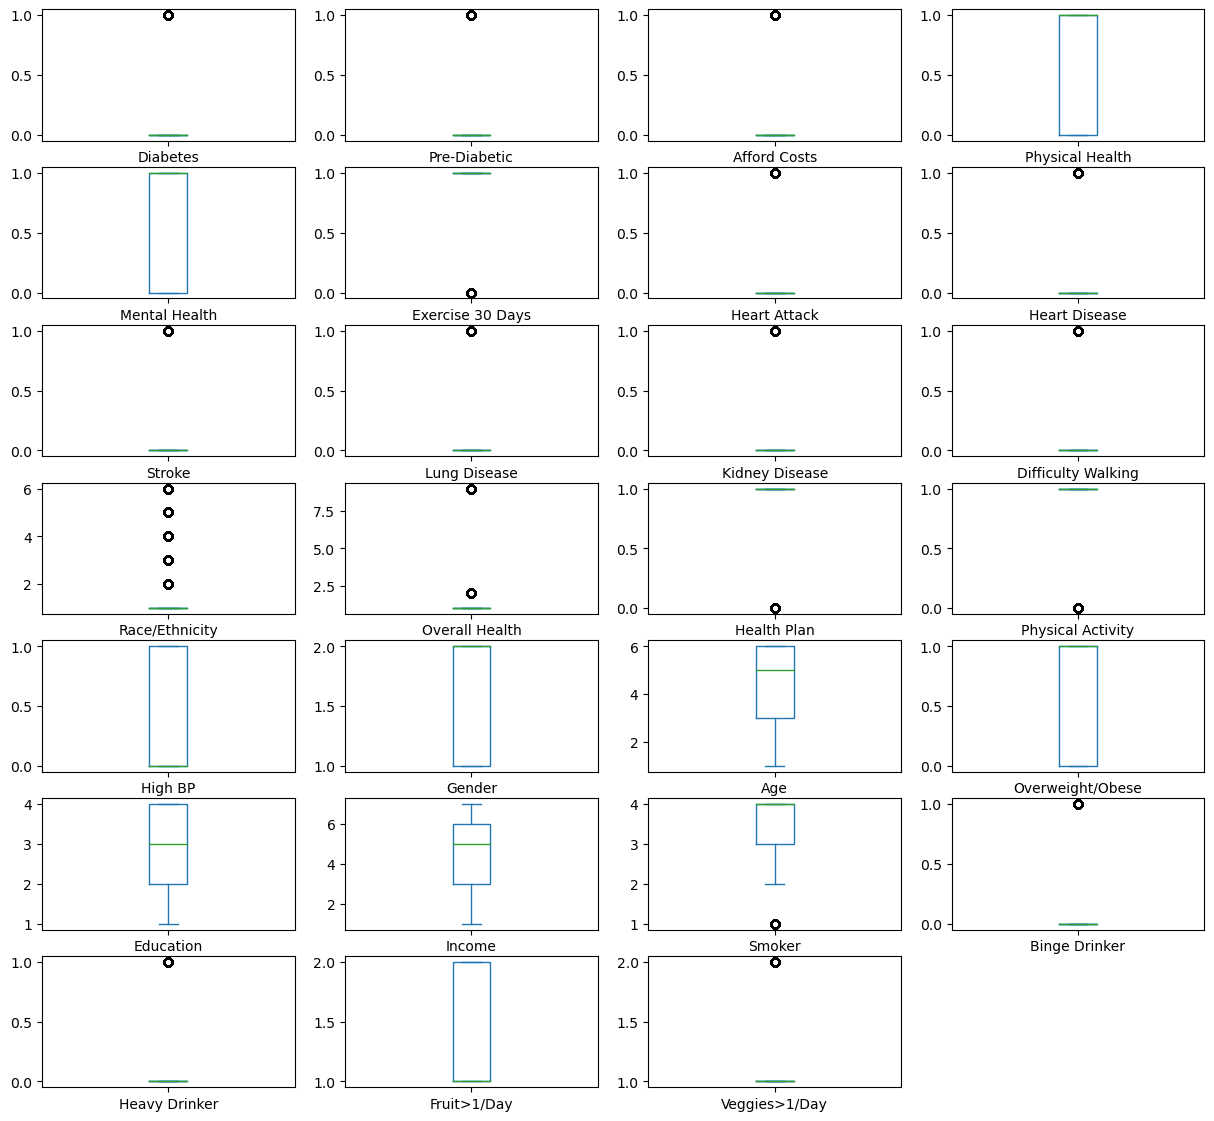

In [86]:
diabetes_df.plot (kind="box", subplots=True, layout=(7,4), figsize=(15,14))

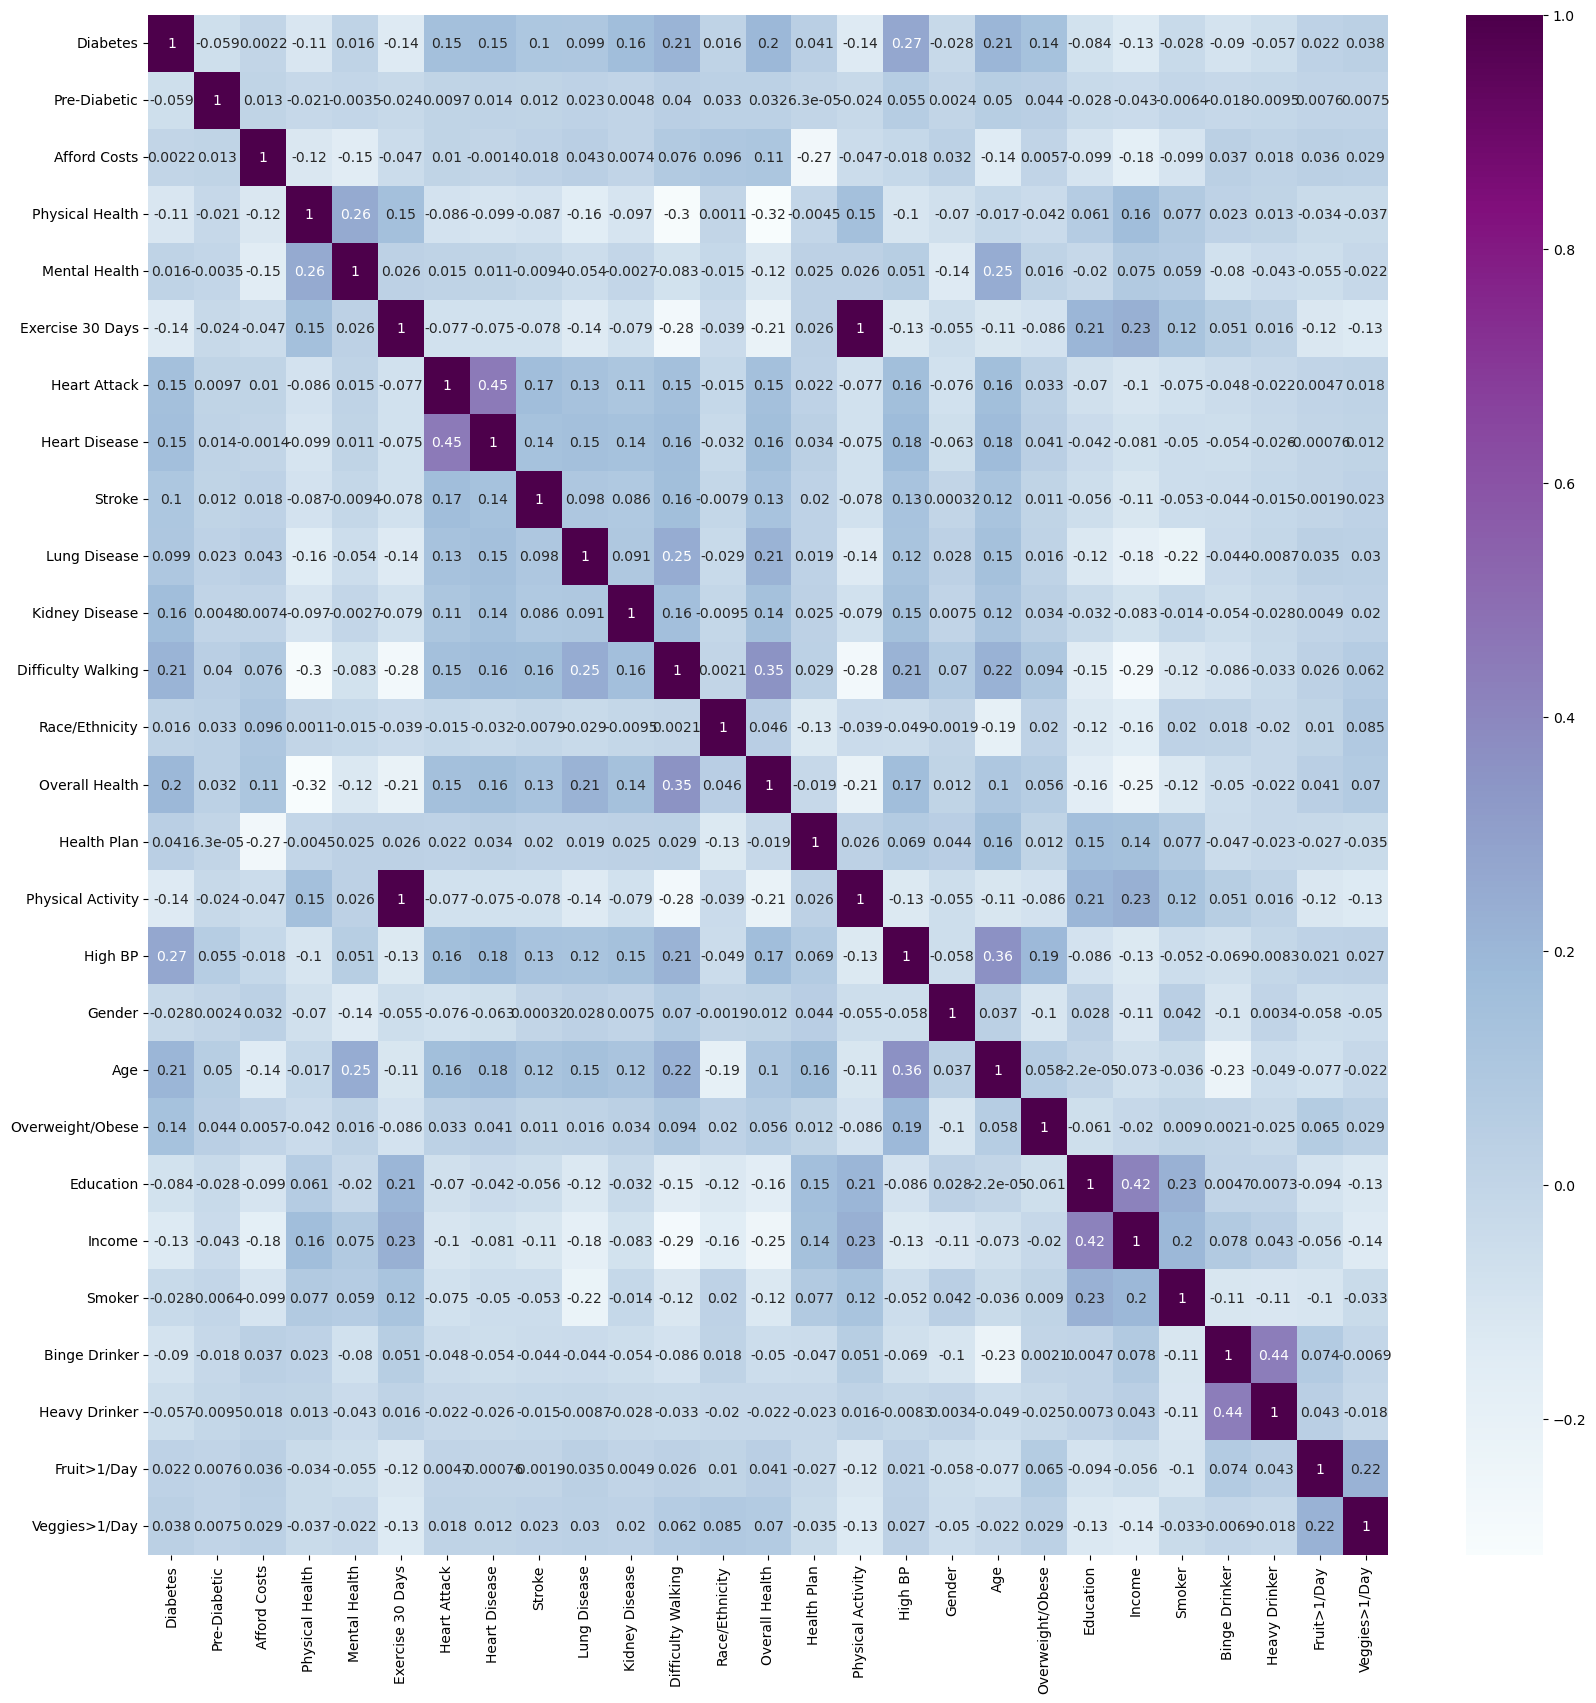

In [47]:
#Creating a heatmap image of the original data
plt.figure(figsize=(20,20))
g=sns.heatmap(diabetes_df.corr(),annot=True, cmap ='BuPu')

In [51]:
#seleting indicators 
columns=['Diabetes','Pre-Diabetic','Physical Health','Mental Health','Exercise 30 Days','Heart Attack','Heart Disease','Stroke','Lung Disease','Kidney Disease','Overall Health','Physical Activity','High BP','Gender','Age','Overweight/Obese','Smoker','Heavy Drinker']
diabetes_df_cleaned=diabetes_df_cleaned[columns]
diabetes_df_cleaned.head()

,Diabetes,Pre-Diabetic,Physical Health,Mental Health,Exercise 30 Days,Heart Attack,Heart Disease,Stroke,Lung Disease,Kidney Disease,Overall Health,Physical Activity,High BP,Gender,Age,Overweight/Obese,Smoker,Heavy Drinker
0,0,0,0,0,0,0,0,0,1,0,2,0,0,2,6,0,3,0
1,1,0,1,1,0,0,1,0,0,0,1,0,1,2,6,1,4,0
2,1,0,1,0,1,0,0,0,0,0,1,1,1,2,5,1,4,0
3,0,0,1,1,0,0,0,0,1,0,1,0,0,1,6,0,3,0
4,0,0,0,0,1,0,0,0,0,0,1,1,1,2,6,1,3,0


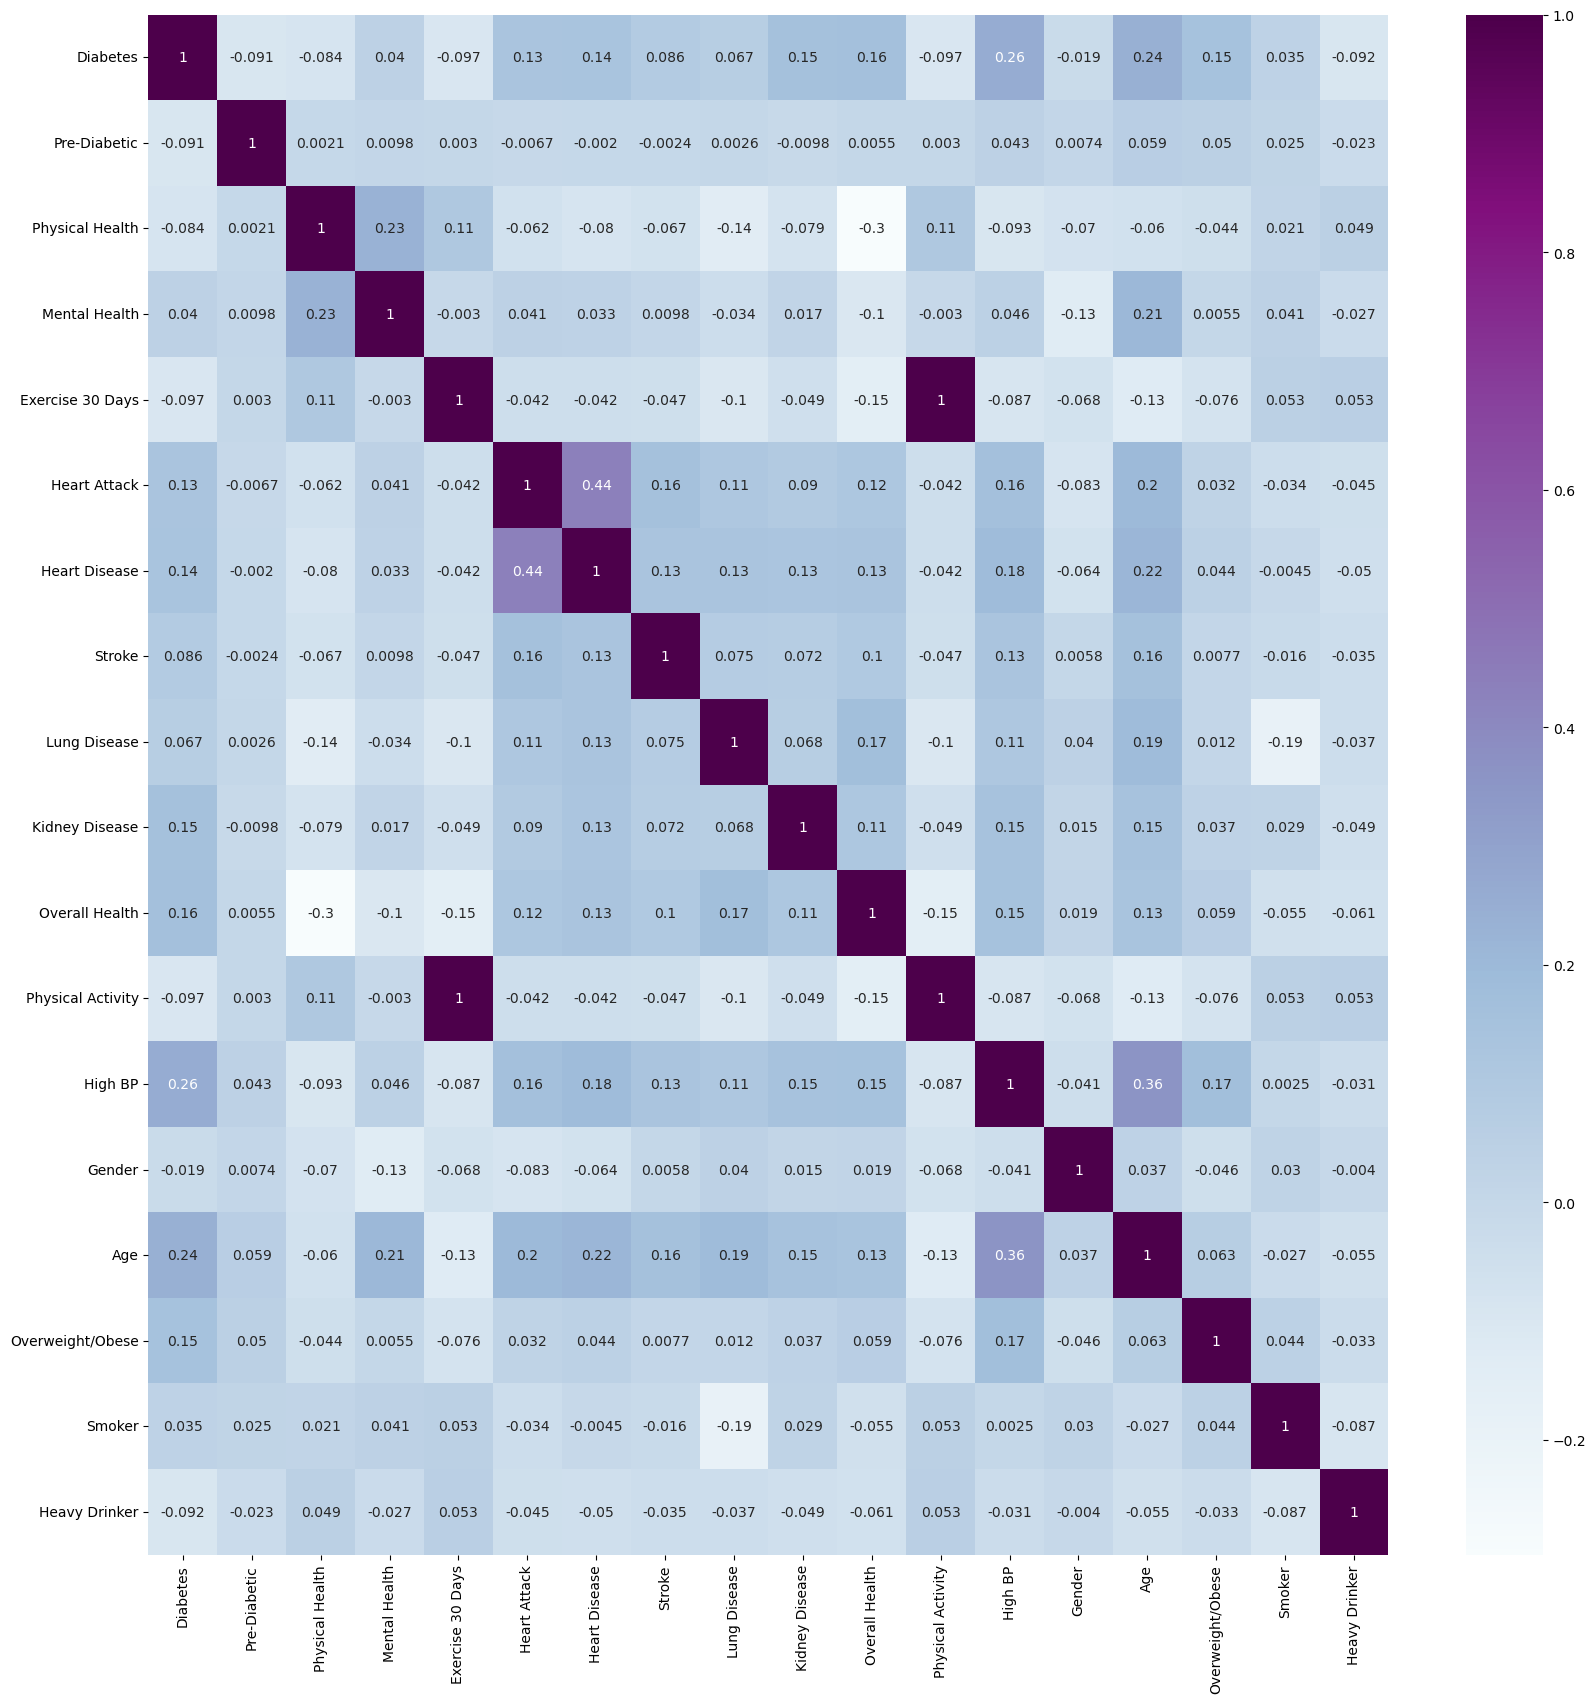

In [53]:
#creating the heatmap image for the cleaned data with limited indicators
plt.figure(figsize=(20,20))
g=sns.heatmap(diabetes_df_cleaned.corr(),annot=True, cmap ='BuPu')

C:\Users\LaNaturess\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


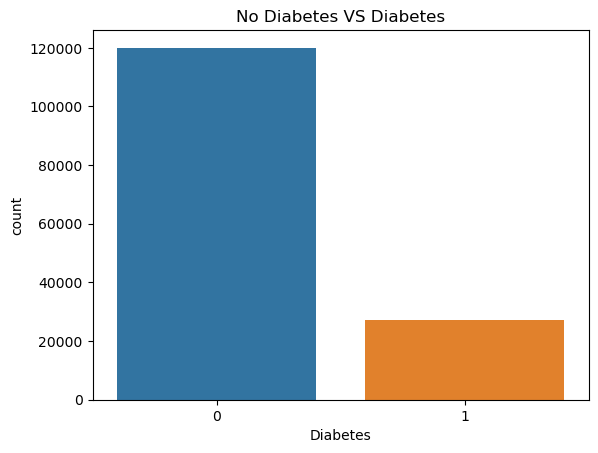

In [54]:
sns.countplot(diabetes_df_cleaned["Diabetes"])
labels = ["no diabetes", "diabetes"]
plt.title("No Diabetes VS Diabetes")
plt.show()

C:\Users\LaNaturess\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


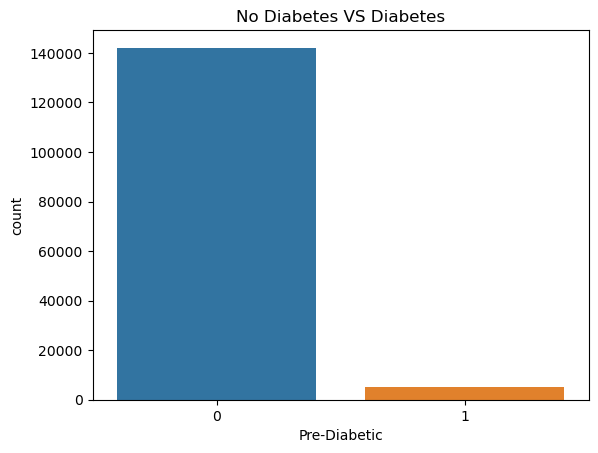

In [55]:
sns.countplot(diabetes_df_cleaned["Pre-Diabetic"])
labels = ["no diabetes", "diabetes"]
plt.title("No Diabetes VS Diabetes")
plt.show()

## Diabetes by Gender

In [56]:
#Gender 1 = Male 2 = Female
diabetes_gender= diabetes_df_cleaned['Gender'].value_counts()
diabetes_gender

2    75539
1    71682
Name: Gender, dtype: int64

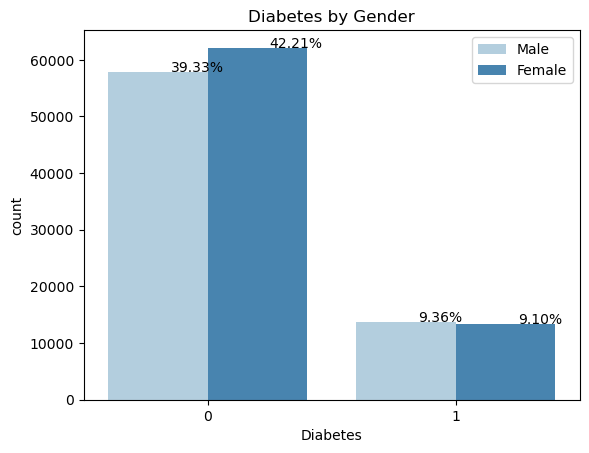

In [93]:
#plotting male and female with diabetes or no diabetes (diabetes =1, no diabetes= 0)

x= sns.countplot(x='Diabetes',data=diabetes_df_cleaned, hue='Gender', palette='Blues')

labels = ["no diabetes", "diabetes"]
plt.legend(['Male', "Female"])
plt.title("Diabetes by Gender")
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/diabetes_df_cleaned.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

## Diabetes by Age

In [96]:
age = pd.cut(diabetes_df_cleaned['Age'],bins=[0,4,7,10,12,14],labels=['18:34','35:49','50:64','65:74','75 and older'])
age

0         35:49
1         35:49
2         35:49
3         35:49
4         35:49
          ...  
242882    18:34
242883    35:49
242884    18:34
242886    35:49
242887    18:34
Name: Age, Length: 147221, dtype: category
Categories (5, object): ['18:34' < '35:49' < '50:64' < '65:74' < '75 and older']

<Figure size 1000x600 with 0 Axes>

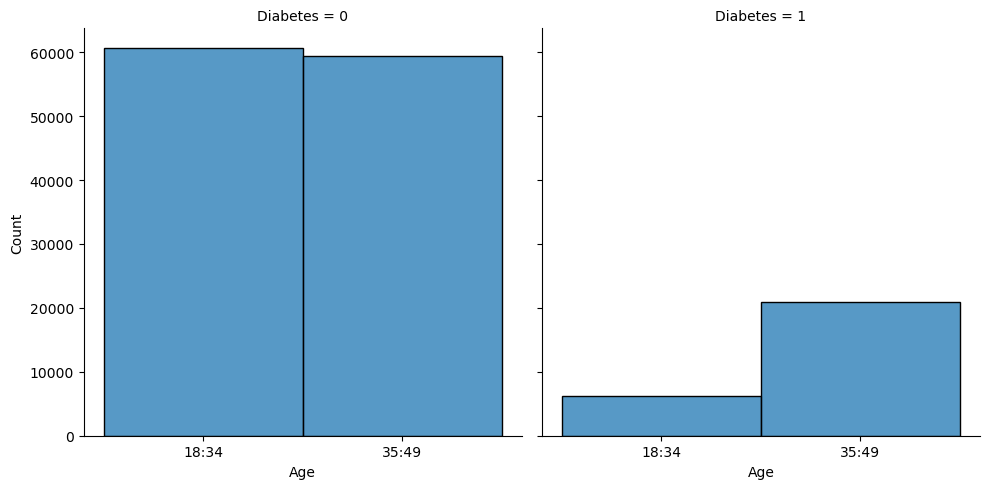

In [110]:
plt.figure(figsize=(10,6))
sns.displot(data=diabetes_df_cleaned,col='Diabetes',x=age);

## Diabetes by High BP

In [107]:
diabetes_df_cleaned['High BP'].value_counts()

0    79911
1    67310
Name: High BP, dtype: int64

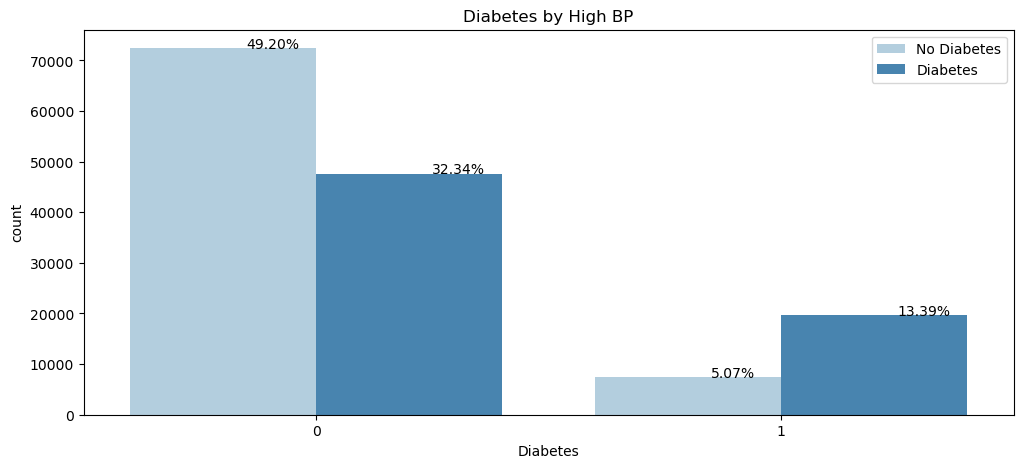

In [121]:
plt.figure(figsize=(12,5))
x= sns.countplot(data=diabetes_df_cleaned,x='Diabetes',hue='High BP', palette='Blues')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/diabetes_df_cleaned.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))

plt.legend(['No Diabetes', "Diabetes"]) 
plt.title("Diabetes by High BP")
plt.show()

## Diabetes by Heart Disease

In [114]:
diabetes_df_cleaned['Heart Disease'].value_counts()

0    135260
1     11961
Name: Heart Disease, dtype: int64

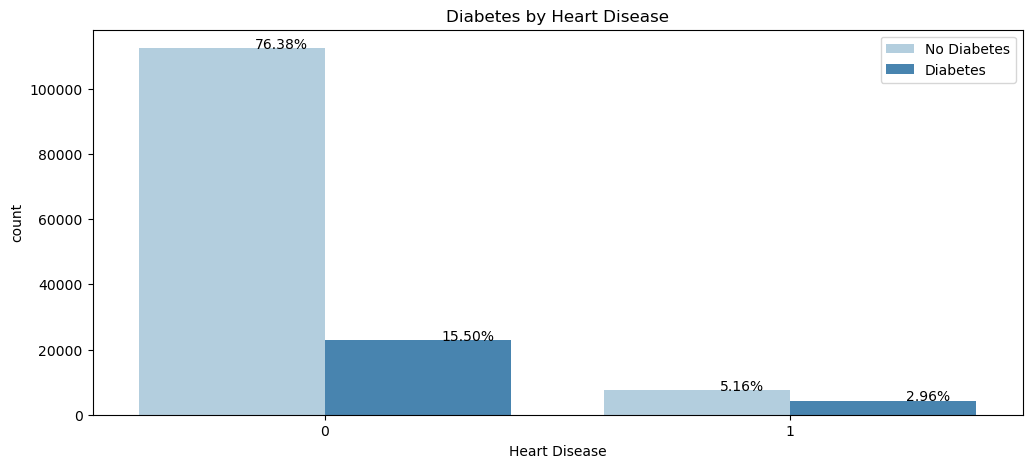

In [122]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='Heart Disease', hue='Diabetes' , data = diabetes_df_cleaned, palette='Blues');
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/diabetes_df_cleaned.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))

plt.legend(['No Diabetes', "Diabetes"])
plt.title("Diabetes by Heart Disease")
plt.show()

## Diabetes by Smoker

In [124]:
# Smoker
#1 = Current smoker -now smokes every day 
#2 = Current smoker -now smokes some days 
#3 = Former smoker 
#4 = Never smoked 

diabetes_df_cleaned['Smoker'].value_counts()

4    72557
3    45955
1    20720
2     7989
Name: Smoker, dtype: int64

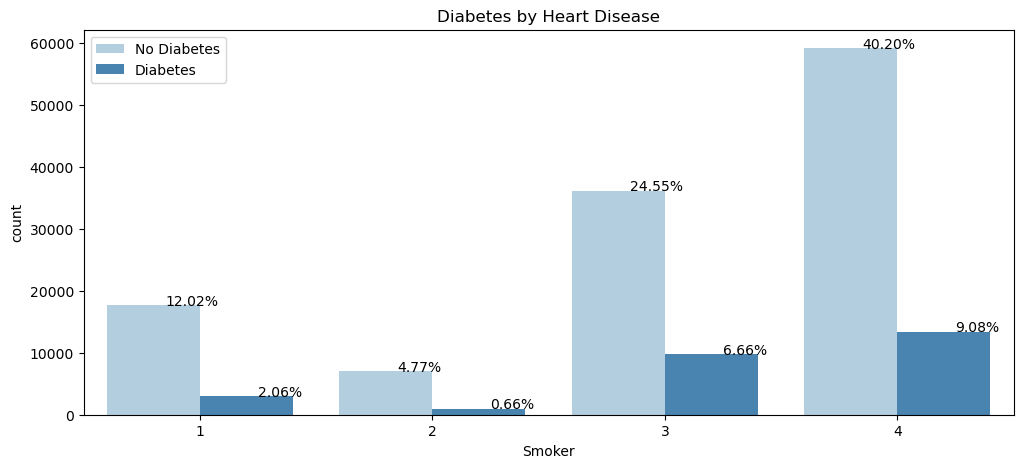

In [125]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='Smoker', hue='Diabetes' , data = diabetes_df_cleaned, palette='Blues');
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/diabetes_df_cleaned.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))


plt.legend(['No Diabetes', "Diabetes"])
plt.title("Diabetes by Heart Disease")
plt.show()

## Diabetes by Weight

In [126]:
diabetes_df_cleaned['Overweight/Obese'].value_counts()

1    105398
0     41823
Name: Overweight/Obese, dtype: int64

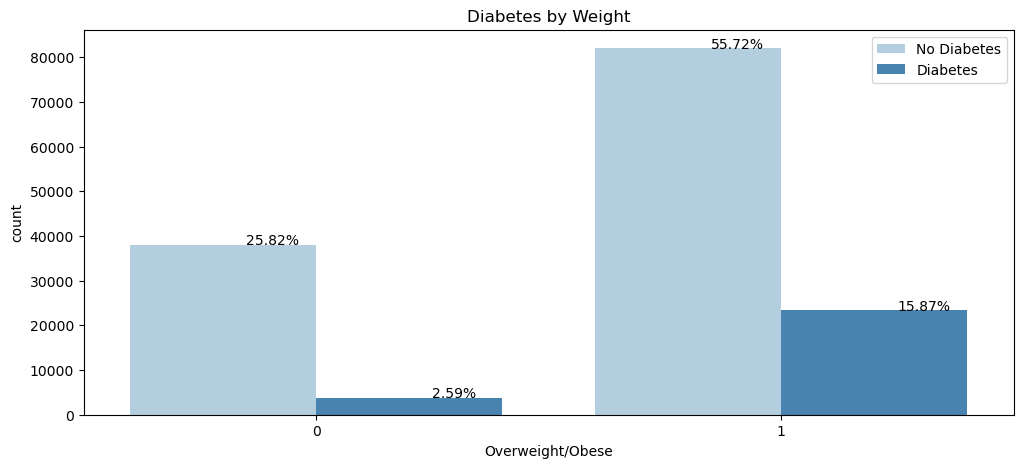

In [127]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='Overweight/Obese', hue='Diabetes' , data = diabetes_df_cleaned, palette='Blues');
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/diabetes_df_cleaned.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))


plt.legend(['No Diabetes', "Diabetes"])
plt.title("Diabetes by Weight")
plt.show()

## Diabetes by Heavy Drinkers

In [128]:
diabetes_df_cleaned['Heavy Drinker'].value_counts()

0    134476
1     12745
Name: Heavy Drinker, dtype: int64

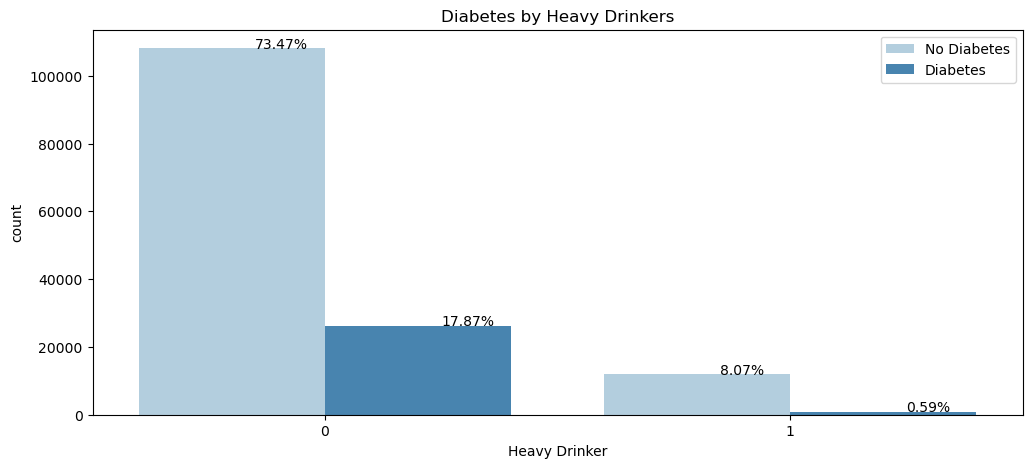

In [129]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='Heavy Drinker', hue='Diabetes' , data = diabetes_df_cleaned, palette='Blues');
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/diabetes_df_cleaned.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))


plt.legend(['No Diabetes', "Diabetes"])
plt.title("Diabetes by Heavy Drinkers")
plt.show()

## Logistic Regression Model

In [130]:
categories_col = ['Diabetes','Pre-Diabetic','Physical Health','Mental Health','Exercise 30 Days','Heart Attack','Heart Disease','Stroke','Lung Disease','Kidney Disease','Overall Health','Physical Activity','High BP','Gender','Age','Overweight/Obese','Smoker','Heavy Drinker']

new_df = diabetes_df[categories_col]
new_df.head()

,Diabetes,Pre-Diabetic,Physical Health,Mental Health,Exercise 30 Days,Heart Attack,Heart Disease,Stroke,Lung Disease,Kidney Disease,Overall Health,Physical Activity,High BP,Gender,Age,Overweight/Obese,Smoker,Heavy Drinker
0,0,0,0,0,0,0,0,0,1,0,2,0,0,2,6,0,3,0
1,1,0,1,1,0,0,1,0,0,0,1,0,1,2,6,1,4,0
2,1,0,1,0,1,0,0,0,0,0,1,1,1,2,5,1,4,0
3,0,0,1,1,0,0,0,0,1,0,1,0,0,1,6,0,3,0
4,0,0,0,0,1,0,0,0,0,0,1,1,1,2,6,1,3,0


In [131]:
y = diabetes_df['Diabetes'].values
X = new_df.values

In [132]:
y =y.astype('int')
X =X.astype('int')

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.25, shuffle=True)
print(y_train)
print(X_train)
print(y_test)
print(X_test)

[0 0 0 ... 0 0 0]
[[0 0 1 ... 0 4 0]
 [0 0 1 ... 1 4 0]
 [0 0 1 ... 1 4 0]
 ...
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 1 4 0]
 [0 0 1 ... 1 4 1]]
[0 0 0 ... 0 0 0]
[[0 0 1 ... 1 4 0]
 [0 0 1 ... 0 4 0]
 [0 0 0 ... 1 3 0]
 ...
 [0 0 1 ... 0 4 0]
 [0 0 1 ... 1 3 0]
 [0 0 1 ... 1 4 0]]


In [134]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(182166,)
(182166, 18)
(60722,)
(60722, 18)


In [161]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score, balanced_accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, precision_recall_fscore_support 

In [137]:
scaler = StandardScaler()


X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [152]:
log_reg = LogisticRegression(solver='lbfgs',max_iter=600, random_state=78)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=600, random_state=78)

In [153]:
intercept = log_reg.intercept_
coefficient = log_reg.coef_

In [154]:
new_list = [intercept, coefficient]

In [155]:
print(new_list)
print(len(intercept))
print(len(coefficient))

[array([-10.57391781]), array([[ 1.61352568e+01, -4.04157803e-01, -1.29430076e-01,
        -6.05236316e-03, -1.01271415e-01,  1.52836636e-01,
         1.14382884e-01,  1.01355506e-01,  4.15317587e-02,
         2.57575808e-01,  2.42481077e-01, -1.01271415e-01,
         4.78307761e-01, -6.24694000e-02,  2.05622687e-01,
         4.05936235e-01, -8.91684993e-03, -2.21928636e-01]])]
1
1


In [156]:
accuracy = log_reg.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  100.0 %


In [158]:
d_pred = log_reg.predict(X_test)
print(d_pred)

[0 0 0 ... 0 0 0]


In [159]:
confusion_matrix(y_test,d_pred)

array([[52749,     0],
       [    0,  7973]], dtype=int64)

In [162]:
precision_recall_fscore_support(y_test,d_pred)

(array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([52749,  7973], dtype=int64))

In [164]:
X_test[0]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 4, 1, 4, 0])

In [167]:
my_list = [[1, 1, 1, 1, 1, 1, 1, 20, 10, 5, 11, 1, 4, 3, 2, 9, 15, 13]]
my_list_sample = X_scaler.transform(np.asarray(my_list))
print(len(my_list_sample), my_list_sample)

1 [[  2.57004735   6.54059477   0.70906404   0.79061667   0.53132693
    4.35168686   4.20474262 106.43958716  37.46399166  25.74519371
   23.38175599   0.53132693   7.37141569   2.96204486  -1.56218087
   18.20373871  12.52807023  53.22376615]]


In [169]:
diabetesPredict = log_reg.predict(my_list_sample)
diabetesProbability = log_reg.predict_proba(my_list_sample)
print('prediction:', diabetesPredict)
print('Probability:', diabetesProbability[0][0])

prediction: [1]
Probability: 0.0


In [170]:
log_reg.coef_

array([[ 1.61352568e+01, -4.04157803e-01, -1.29430076e-01,
        -6.05236316e-03, -1.01271415e-01,  1.52836636e-01,
         1.14382884e-01,  1.01355506e-01,  4.15317587e-02,
         2.57575808e-01,  2.42481077e-01, -1.01271415e-01,
         4.78307761e-01, -6.24694000e-02,  2.05622687e-01,
         4.05936235e-01, -8.91684993e-03, -2.21928636e-01]])

In [171]:
print("Classification Report is:\n",classification_report(y_test,d_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52749
           1       1.00      1.00      1.00      7973

    accuracy                           1.00     60722
   macro avg       1.00      1.00      1.00     60722
weighted avg       1.00      1.00      1.00     60722



In [172]:
# def plot_confusion_matrix(cm,
#                           target_names,
#                           title='Confusion matrix',
#                           cmap=None,
#                           normalize=True):
    

#     accuracy = np.trace(cm) / np.sum(cm).astype('float')
#     misclass = 1 - accuracy

#     if cmap is None:
#         cmap = plt.get_cmap('Blues')

#     plt.figure(figsize=(8, 6))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()

#     if target_names is not None:
#         tick_marks = np.arange(len(target_names))
#         plt.xticks(tick_marks, target_names, rotation=0)
#         plt.yticks(tick_marks, target_names)
        
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


#     thresh = cm.max() / 1.5 if normalize else cm.max() / 2
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         if normalize:
#             plt.text(j, i, "{:0.4f}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")
#         else:
#             plt.text(j, i, "{:,}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")
            
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.show()

In [175]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y, test_size=0.3 , random_state=1)

In [176]:
logreg = LogisticRegression()
logreg.fit(X_train , Y_train)

LogisticRegression()